In [1]:
from google.colab import files
uploaded = files.upload()

Saving whole tasmania .zip to whole tasmania .zip


In [2]:
!unzip "/content/whole tasmania .zip" -d "/content/tasmania_tiles"


Archive:  /content/whole tasmania .zip
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody00.tfw  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody00.tif  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody00.tif.aux.xml  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody00.tif.ovr  
 extracting: /content/tasmania_tiles/sk55_woody_8822/woody00.tif.vat.cpg  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody00.tif.vat.dbf  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody00.tif.xml  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody02.tfw  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody02.tif  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody02.tif.aux.xml  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody02.tif.ovr  
 extracting: /content/tasmania_tiles/sk55_woody_8822/woody02.tif.vat.cpg  
  inflating: /content/tasmania_tiles/sk55_woody_8822/woody02.tif.vat.dbf  
  inflating: /content/tasmania

In [3]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 107.6 MB/s eta 0:00:00


In [4]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window
from glob import glob
from tqdm import tqdm
from PIL import Image




In [5]:
# === Step 2: Set paths ===
input_folder = "/content/tasmania_tiles"  # May include subfolders
output_folder = "/content/tasmania_patches"
tile_size = 64
stride = 64
os.makedirs(output_folder, exist_ok=True)

In [6]:
# === Step 3: Find all .tif files and take only the first 5 ===
tif_files = sorted(glob(os.path.join(input_folder, "**/*.tif"), recursive=True))
tif_files = tif_files[:27]  # Only use the first 5
print("✅ Using these 27 files:")
for f in tif_files:
    print("-", os.path.basename(f))


✅ Using these 27 files:
- woody00.tif
- woody02.tif
- woody04.tif
- woody05.tif
- woody06.tif
- woody07.tif
- woody08.tif
- woody09.tif
- woody10.tif
- woody11.tif
- woody12.tif
- woody13.tif
- woody14.tif
- woody15.tif
- woody16.tif
- woody17.tif
- woody18.tif
- woody19.tif
- woody20.tif
- woody21.tif
- woody22.tif
- woody88.tif
- woody89.tif
- woody91.tif
- woody92.tif
- woody95.tif
- woody98.tif


In [7]:
# === Step 4: Loop through .tif files and extract patches ===
patch_count = 0


In [8]:
for tif_path in tif_files:
    print(f"\n📂 Processing {os.path.basename(tif_path)}")
    with rasterio.open(tif_path) as src:
        width, height = src.width, src.height
        nodata_val = src.nodata if src.nodata is not None else -9999

        for y in tqdm(range(0, height - tile_size + 1, stride), desc=os.path.basename(tif_path)):
            for x in range(0, width - tile_size + 1, stride):
                window = Window(x, y, tile_size, tile_size)
                patch = src.read(1, window=window)

                # Skip fully empty or nodata patches (optional)
                if np.all(patch == 0) or np.all(patch == nodata_val):
                    continue

                # Get dominant class
                values, counts = np.unique(patch, return_counts=True)
                majority_class = int(values[np.argmax(counts)])

                # Generate file name
                base_name = f"{os.path.splitext(os.path.basename(tif_path))[0]}_x{x}_y{y}_class{majority_class}"
                npy_path = os.path.join(output_folder, base_name + ".npy")
                png_path = os.path.join(output_folder, base_name + ".png")

                # Save .npy
                np.save(npy_path, patch)

                # Save .png for visual debugging
                scaled_img = Image.fromarray((patch * 127).astype(np.uint8))  # Scale: 0/1/2 -> 0/127/254
                scaled_img.save(png_path)

                patch_count += 1

print(f"\n✅ Patch extraction complete. Saved {patch_count} patches to {output_folder}")


📂 Processing woody00.tif


woody00.tif: 100%|██████████| 264/264 [00:24<00:00, 10.74it/s]



📂 Processing woody02.tif


woody02.tif: 100%|██████████| 264/264 [00:24<00:00, 10.85it/s]



📂 Processing woody04.tif


woody04.tif: 100%|██████████| 264/264 [00:24<00:00, 10.93it/s]



📂 Processing woody05.tif


woody05.tif: 100%|██████████| 264/264 [00:23<00:00, 11.17it/s]



📂 Processing woody06.tif


woody06.tif: 100%|██████████| 264/264 [00:23<00:00, 11.03it/s]



📂 Processing woody07.tif


woody07.tif: 100%|██████████| 264/264 [00:24<00:00, 10.84it/s]



📂 Processing woody08.tif


woody08.tif: 100%|██████████| 264/264 [00:24<00:00, 10.81it/s]



📂 Processing woody09.tif


woody09.tif: 100%|██████████| 264/264 [00:24<00:00, 10.84it/s]



📂 Processing woody10.tif


woody10.tif: 100%|██████████| 264/264 [00:25<00:00, 10.38it/s]



📂 Processing woody11.tif


woody11.tif: 100%|██████████| 264/264 [00:24<00:00, 10.67it/s]



📂 Processing woody12.tif


woody12.tif: 100%|██████████| 264/264 [00:25<00:00, 10.45it/s]



📂 Processing woody13.tif


woody13.tif: 100%|██████████| 264/264 [00:25<00:00, 10.47it/s]



📂 Processing woody14.tif


woody14.tif: 100%|██████████| 264/264 [00:25<00:00, 10.47it/s]



📂 Processing woody15.tif


woody15.tif: 100%|██████████| 264/264 [00:24<00:00, 10.62it/s]



📂 Processing woody16.tif


woody16.tif: 100%|██████████| 264/264 [00:26<00:00, 10.07it/s]



📂 Processing woody17.tif


woody17.tif: 100%|██████████| 264/264 [00:25<00:00, 10.22it/s]



📂 Processing woody18.tif


woody18.tif: 100%|██████████| 264/264 [00:26<00:00,  9.86it/s]



📂 Processing woody19.tif


woody19.tif: 100%|██████████| 264/264 [00:26<00:00, 10.09it/s]



📂 Processing woody20.tif


woody20.tif: 100%|██████████| 264/264 [00:26<00:00, 10.12it/s]



📂 Processing woody21.tif


woody21.tif: 100%|██████████| 264/264 [00:25<00:00, 10.19it/s]



📂 Processing woody22.tif


woody22.tif: 100%|██████████| 264/264 [00:26<00:00,  9.83it/s]



📂 Processing woody88.tif


woody88.tif: 100%|██████████| 264/264 [00:25<00:00, 10.28it/s]



📂 Processing woody89.tif


woody89.tif: 100%|██████████| 264/264 [00:26<00:00,  9.86it/s]



📂 Processing woody91.tif


woody91.tif: 100%|██████████| 264/264 [00:26<00:00,  9.81it/s]



📂 Processing woody92.tif


woody92.tif: 100%|██████████| 264/264 [00:25<00:00, 10.19it/s]



📂 Processing woody95.tif


woody95.tif: 100%|██████████| 264/264 [00:26<00:00, 10.15it/s]



📂 Processing woody98.tif


woody98.tif: 100%|██████████| 264/264 [00:26<00:00,  9.78it/s]


✅ Patch extraction complete. Saved 818398 patches to /content/tasmania_patches


In [9]:
import os
from collections import Counter

# Folder where your patches are stored
patch_folder = "/content/tasmania_patches"

# List all files (we only need .npy or .png, not both)
patch_files = [f for f in os.listdir(patch_folder) if f.endswith('.npy')]

# Extract class label from filename (e.g., ..._class2.npy → 2)
classes = [f.split('_class')[-1].split('.')[0] for f in patch_files]

# Count classes
class_counts = Counter(classes)

# Print results
print("📊 Patch class distribution:")
for label, count in sorted(class_counts.items()):
    print(f"  Class {label}: {count} patches")


📊 Patch class distribution:
  Class 0: 239432 patches
  Class 1: 1641 patches
  Class 2: 577325 patches


In [10]:
import os
import shutil
from collections import defaultdict
import random

# === CONFIGURATION ===
input_dir = "/content/tasmania_patches"
output_base = "/content/tasmania_split"
os.makedirs(output_base, exist_ok=True)

split_ratios = {'train': 0.7, 'val': 0.15, 'test': 0.15}
classes = ['0', '1', '2']
file_dict = defaultdict(list)

# === Step 1: Group files by class ===
for file in os.listdir(input_dir):
    if not file.endswith('.npy'):
        continue
    cls = file.split('_class')[-1].split('.')[0]
    file_dict[cls].append(file)

# === Step 2: Stratified split and copy ===
for cls, files in file_dict.items():
    random.shuffle(files)
    total = len(files)
    train_end = int(split_ratios['train'] * total)
    val_end = train_end + int(split_ratios['val'] * total)

    splits = {
        'train': files[:train_end],
        'val': files[train_end:val_end],
        'test': files[val_end:]
    }

    for split_name, split_files in splits.items():
        split_dir = os.path.join(output_base, split_name)
        os.makedirs(split_dir, exist_ok=True)

        for f in split_files:
            # Copy .npy
            src_npy = os.path.join(input_dir, f)
            dst_npy = os.path.join(split_dir, f)
            shutil.copy2(src_npy, dst_npy)

            # Copy corresponding .png if it exists
            png_file = f.replace('.npy', '.png')
            src_png = os.path.join(input_dir, png_file)
            if os.path.exists(src_png):
                dst_png = os.path.join(split_dir, png_file)
                shutil.copy2(src_png, dst_png)

print("✅ Dataset successfully split into train/val/test folders!")


✅ Dataset successfully split into train/val/test folders!


In [11]:
from torch.utils.data import Dataset
import numpy as np
import torch
import os

class ForestPatchDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        npy_file = self.files[idx]
        data = np.load(os.path.join(self.folder_path, npy_file)).astype(np.float32)
        data = np.expand_dims(data, axis=0)  # Add channel dim

        label = int(npy_file.split('_class')[-1].split('.')[0])
        if self.transform:
            data = self.transform(data)
        return torch.tensor(data), torch.tensor(label)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 -> 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 -> 16x16
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.fc1(x))
        return self.fc2(x)


In [13]:
from torch.utils.data import DataLoader

batch_size = 64

train_dataset = ForestPatchDataset("/content/tasmania_split/train")
val_dataset = ForestPatchDataset("/content/tasmania_split/val")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [14]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # You can increase epochs
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1} - Loss: {running_loss:.4f} - Train Acc: {train_acc:.2f}%")


Epoch 1 - Loss: 183.5437 - Train Acc: 99.20%
Epoch 2 - Loss: 108.0267 - Train Acc: 99.50%
Epoch 3 - Loss: 85.3792 - Train Acc: 99.61%
Epoch 4 - Loss: 76.9766 - Train Acc: 99.66%
Epoch 5 - Loss: 70.7120 - Train Acc: 99.69%


In [15]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ Validation Accuracy: {100 * correct / total:.2f}%")

✅ Validation Accuracy: 99.60%


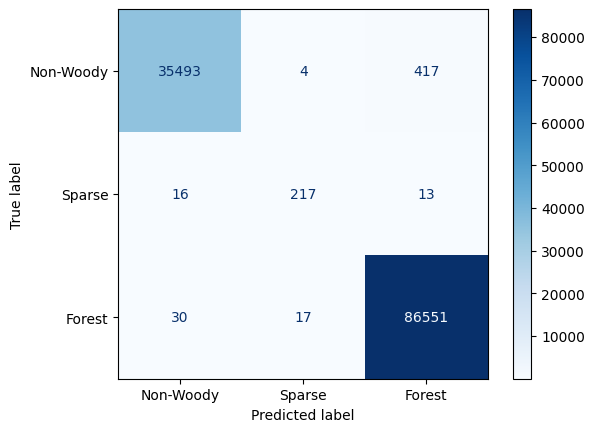

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds, all_labels = [], []

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs.to(device))
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Woody', 'Sparse', 'Forest'])
disp.plot(cmap='Blues')


In [17]:
import torch

# Updated class counts
class_counts = {
    0: 43987,
    1: 280,
    2: 107037
}

# Inverse frequency with protection
class_weights_list = [
    1 / class_counts[i] if class_counts[i] > 0 else 0.0
    for i in range(3)
]

# Normalize to sum to 1 (optional, for scale stability)
class_weights = torch.tensor(class_weights_list, dtype=torch.float32)
class_weights = class_weights / class_weights.sum()
class_weights = class_weights.to(device)

# Show the weights
print("Class weights:", class_weights)


Class weights: tensor([0.0063, 0.9911, 0.0026], device='cuda:0')


In [18]:
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [19]:
for epoch in range(6, 11):  # Continue from epoch 6
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch} - Loss: {running_loss:.4f} - Train Acc: {train_acc:.2f}%")


Epoch 6 - Loss: 331.8985 - Train Acc: 99.40%
Epoch 7 - Loss: 280.0474 - Train Acc: 99.40%
Epoch 8 - Loss: 299.9700 - Train Acc: 99.34%
Epoch 9 - Loss: 277.2696 - Train Acc: 99.31%
Epoch 10 - Loss: 242.1528 - Train Acc: 99.36%


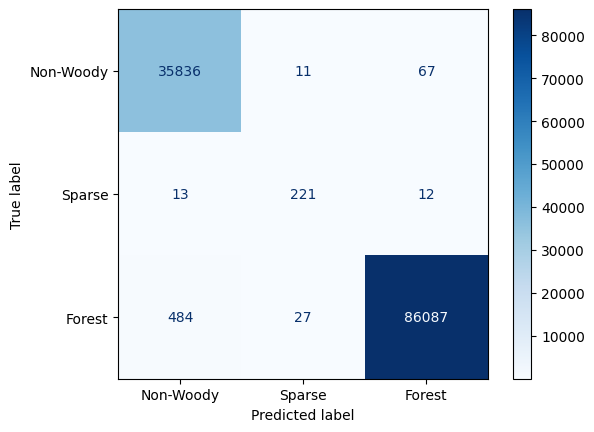

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

all_preds, all_labels = [], []

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs.to(device))
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Woody', 'Sparse', 'Forest'])
disp.plot(cmap='Blues')


In [21]:
from torch.utils.data import DataLoader

test_dataset = ForestPatchDataset("/content/tasmania_split/test")
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


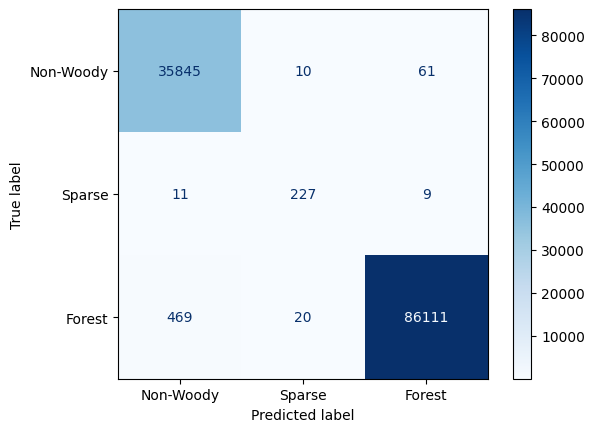

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Woody', 'Sparse', 'Forest'])
disp.plot(cmap='Blues')


In [23]:
correct = sum(p == l for p, l in zip(all_preds, all_labels))
total = len(all_labels)
print(f"✅ Test Accuracy: {100 * correct / total:.2f}%")


✅ Test Accuracy: 99.53%


In [24]:
torch.save(model.state_dict(), "forest_classifier_final.pth")
print("✅ Model saved as forest_classifier_final.pth")


✅ Model saved as forest_classifier_final.pth


In [25]:
# Recreate the model structure
model = SimpleCNN(num_classes=3)
model.load_state_dict(torch.load("forest_classifier_final.pth"))
model.to(device)
model.eval()


SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [26]:
from google.colab import files
uploaded = files.upload()

Saving woody00.tif to woody00.tif


In [27]:
import rasterio
from rasterio.windows import Window
import numpy as np
import torch
import matplotlib.pyplot as plt

def predict_tile(model, tif_path, tile_size=64, stride=64):
    model.eval()
    preds = []

    with rasterio.open(tif_path) as src:
        width, height = src.width, src.height
        for y in range(0, height - tile_size + 1, stride):
            row_preds = []
            for x in range(0, width - tile_size + 1, stride):
                window = Window(x, y, tile_size, tile_size)
                patch = src.read(1, window=window).astype(np.float32)

                # Skip empty
                if np.all(patch == 0):
                    row_preds.append(-1)
                    continue

                patch_tensor = torch.tensor(patch).unsqueeze(0).unsqueeze(0).to(device)  # shape: [1, 1, 64, 64]
                with torch.no_grad():
                    output = model(patch_tensor)
                    pred = torch.argmax(output, dim=1).item()
                    row_preds.append(pred)

            preds.append(row_preds)

    return np.array(preds)


In [28]:
def visualize_prediction_map(preds):
    color_map = {
        -1: (255, 255, 255),  # white for skipped
        0: (200, 200, 200),   # gray for non-woody
        1: (255, 215, 0),     # yellow for sparse woody
        2: (34, 139, 34)      # forest green
    }

    h, w = preds.shape
    img = np.zeros((h, w, 3), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            img[y, x] = color_map[preds[y, x]]

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title("Predicted Forest Classes")
    plt.axis("off")
    plt.show()


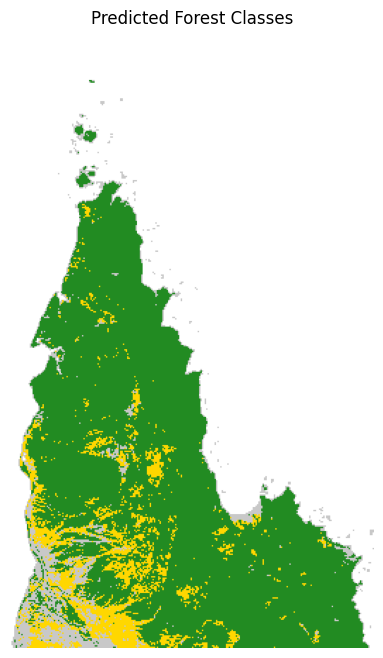

In [29]:
# Replace with your actual uploaded file name
tif_path = "/content/woody00.tif"

prediction_map = predict_tile(model, tif_path)
visualize_prediction_map(prediction_map)


In [30]:
import matplotlib.pyplot as plt
import rasterio

def load_ground_truth(tif_path):
    with rasterio.open(tif_path) as src:
        gt = src.read(1)
    return gt

def plot_comparison(ground_truth, prediction_map):
    color_map = {
        -1: (255, 255, 255),  # white for skipped/invalid
        0: (200, 200, 200),   # gray - non-woody
        1: (255, 215, 0),     # yellow - sparse
        2: (34, 139, 34)      # green - forest
    }

    def apply_colors(array):
        h, w = array.shape
        img = np.zeros((h, w, 3), dtype=np.uint8)
        for y in range(h):
            for x in range(w):
                img[y, x] = color_map.get(array[y, x], (0, 0, 0))
        return img

    gt_rgb = apply_colors(ground_truth)
    pred_rgb = apply_colors(prediction_map)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(gt_rgb)
    plt.title("🌍 Original Woody Vegetation (Ground Truth)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(pred_rgb)
    plt.title("🤖 Model Prediction")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [31]:
pred_map = predict_tile(model, "/content/woody00.tif")


<ipython-input-30-d1622ba705e3>:39: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-d1622ba705e3>:39: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


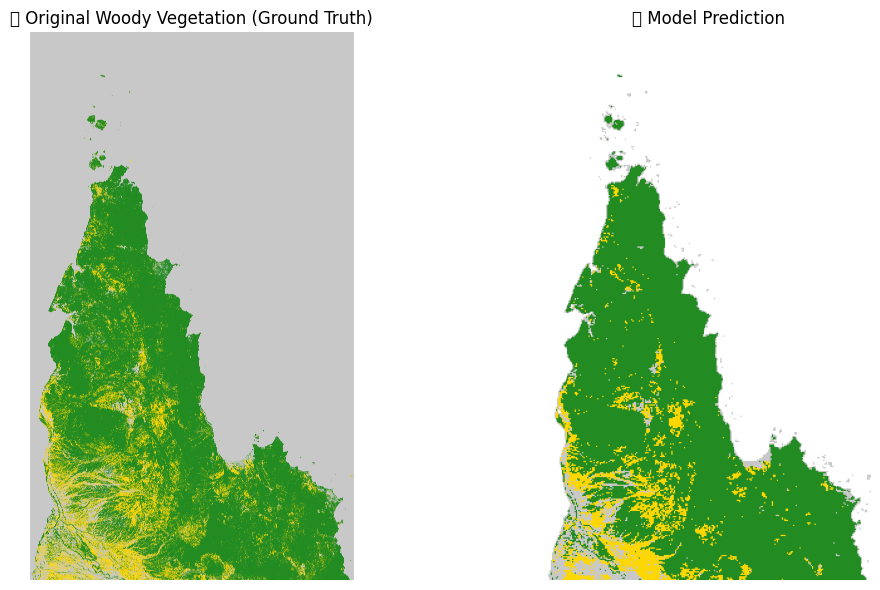

In [32]:
gt_array = load_ground_truth("/content/woody00.tif")
plot_comparison(gt_array, pred_map)


In [33]:
from skimage.measure import block_reduce

# Match size: average over 64x64 blocks using mode (most frequent class in each patch)
def mode_block_reduce(arr, block_size):
    h, w = arr.shape
    new_h = h // block_size
    new_w = w // block_size
    reduced = np.zeros((new_h, new_w), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            block = arr[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            values, counts = np.unique(block, return_counts=True)
            reduced[i, j] = values[np.argmax(counts)]

    return reduced

gt_downsampled = mode_block_reduce(gt_array, 64)


In [34]:
valid_mask = (gt_downsampled >= 0) & (gt_downsampled <= 2)

gt_flat = gt_downsampled[valid_mask].flatten()
pred_flat = pred_map[valid_mask].flatten()

print(f"Total valid pixels: {len(gt_flat)}")


Total valid pixels: 112746


In [35]:
from sklearn.metrics import classification_report

print(classification_report(
    gt_flat, pred_flat,
    labels=[0, 1, 2],
    target_names=["Non-Woody", "Sparse Woody", "Forest"],
    digits=4
))


              precision    recall  f1-score   support

   Non-Woody     0.9648    0.0526    0.0998     71986
Sparse Woody     0.9148    0.9622    0.9379      4999
      Forest     0.9970    0.9882    0.9926     35761

   micro avg     0.9845    0.3897    0.5584    112746
   macro avg     0.9589    0.6677    0.6768    112746
weighted avg     0.9728    0.3897    0.4201    112746



In [36]:
error_map = np.zeros_like(pred_flat, dtype=np.uint8)

for i in range(len(pred_flat)):
    if gt_flat[i] == pred_flat[i]:
        error_map[i] = 0
    else:
        error_map[i] = 1


In [37]:
h, w = pred_map.shape
error_image = error_map.reshape(h, w)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


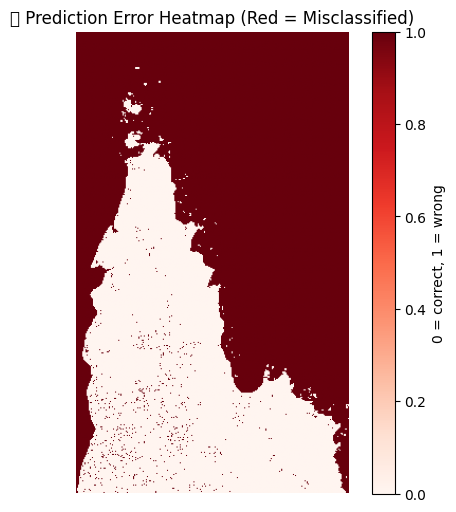

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(error_image, cmap='Reds')
plt.title("🔍 Prediction Error Heatmap (Red = Misclassified)")
plt.axis('off')
plt.colorbar(label="0 = correct, 1 = wrong")
plt.show()


In [41]:
from google.colab import files
files.download("/content/forest_classifier_final.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>